# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="orange"> Sayali More </font>

# I. Overview

- In this assignment we are experimenting with three different networks of Deep Neural Network and observe their results.
- To do so we are going to create different networks with more than 5 layers and each layer having different hidden neurons. 
- This will help us understand how these networks work for our data as compared to how it worked with shallow networks or other models.

# II. Data

### Visualization:

### Classification Data:

The data chosen for this experiment is a labelled Rain Prediction data for tomorrow for Australia. It consists of instances showing rain prediction for tomorrow depending on various whether conditions as its attributes.

#### Source:
The data has been taken from Kaggle https://www.kaggle.com/kuncoroaji/weather-aus. The data was stored in a csv file.

#### Description:

The data has dimensions as 14Kx24 i.e. it has total 142193 instances and 24 columns. Out of which 23 are the input features and 1 is the target attribute. The data is collected from 2007 - 2017 and it tells about the weather conditions for each day.

Column Description: 

| Column Name     | Description                                       | Unit          |   
|-----------------|---------------------------------------------------|---------------|  
|   Date          | Date when the features where recorded             | mm/dd/yyyy    | 
| Location        | City names                                        |               |
|  MinTemp        | Minimum temperature in the 24 hours               | degree celsius|          
|   MaxTemp       | Minimum temperature in the 24 hours               | degree celsius| 
| Rainfall        | Precipitation (rainfall) in the 24 hours          |   millimetres |
|  Evaporation    | "Class A" pan evaporation in the 24 hours         |   millimetres |            
|   Sunshine      | Bright sunshine in the 24 hours to midnight       |    hours      |
| WindGustDir     | Direction of strongest gust in the 24 hours to midnight    | 16 compass points   | 
| WindGustSpeed   | Speed of strongest wind gust in the 24 hours to midnight | kilometres per hour  | 
| WindDir9am      | Wind direction averaged over 10 minutes prior to 9 am    | compass points       |
| WindDir3pm      | Wind direction averaged over 10 minutes prior to 3 pm    |  compass points      |
| WindSpeed9am    |  Wind speed averaged over 10 minutes prior to 9 am       |  kilometres per hour |              
| WindSpeed3pm    | Wind speed averaged over 10 minutes prior to 3 pm        | kilometres per hour  |
| Humidity9am     | Relative humidity at 9 am                                |  percentage          |
| Humidity3pm     |  Relative humidity at 3 pm                               |  percentage          |
| Pressure9am     | Atmospheric pressure reduced to mean sea level at 9 am   |   hectopascals       |
| Pressure3pm     | Atmospheric pressure reduced to mean sea level at 3 pm   |   hectopascals       |
| Cloud9am        |  Fraction of sky obscured by cloud at 9 am               |   eighths            |
| Cloud3pm        |  Fraction of sky obscured by cloud at 3 pm               |   eighths            |
| Temp9am         |  Temperature at 9 am                                     |  degree celsius      |
| Temp3pm         | Temperature at 3 pm                                      |  degree celsius      |
|  RainToday      |  If it rained today                                      | Yes/No               |
| RISK_MM         | The amount of rain. A kind of measure of the "risk"      |                      |
| RainTomorrow (Target Attribute)   | Did it rain the  next day?                                 | Yes/No               |




In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from copy import deepcopy as copy
from abc import ABC, abstractmethod
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv("weatherAUS.csv")

In [17]:
df.shape

(142193, 24)

In [18]:
#Checking for duplicates
np.any(df.duplicated())

False

In [19]:
#Checking if there are any Null values
np.any(df.isnull())

True

In [20]:
#Since the isNull() returned True value we nee
df = df.dropna(axis = 0, how ='any')

In [21]:
print(df.shape)
print(np.any(df.isnull()))

(56420, 24)
False


In [22]:
df.to_csv("Preprocessed_Data.csv", index = False, sep = ',')

In [23]:
locdic = { b'Adelaide' : 0,b'Albany' : 1, b'Albury' : 2, b'AliceSprings' : 3, b'BadgerysCreek' : 4, b'Ballarat': 5, 
          b'Bendigo' : 6, b'Brisbane' : 7, b'Cairns' :8, b'Canberra' : 9, b'Cobar' : 10, b'CoffsHarbour' : 11, b'Dartmoor' :12,
          b'Darwin': 13,b'GoldCoast':14, b'Hobart': 15, b'Katherine': 16, b'Launceston': 17, b'Melbourne': 18, b'MelbourneAirport': 19,
b'Mildura': 20, b'Moree': 21, b'MountGambier':22, b'MountGinini': 23, b'Newcastle': 24,b'Nhil': 25,
b'NorahHead': 26, b'NorfolkIsland': 27, b'Nuriootpa': 28, b'PearceRAAF': 29, b'Penrith': 30, b'Perth': 31, b'PerthAirport': 32,
b'Portland': 33, b'Richmond': 34,b'Sale': 35, b'SalmonGums':36, b'Sydney': 37, b'SydneyAirport': 38, b'Townsville': 39, 
b'Tuggeranong': 40, b'Uluru': 41, b'WaggaWagga': 42, b'Walpole': 43, b'Watsonia': 44, b'Williamtown': 45, b'Witchcliffe': 46, b'Wollongong':47,
b'Woomera': 48}

winddic = {b'NE' : 0,b'SSW' : 1,b'SW' : 2,b'W' : 3,b'WSW' : 4,b'S':5,b'NW': 6,b'SE' : 7,b'N' : 8, b'SSE' : 9,
           b'NNE' : 10, b'E' : 11,b'ESE' : 12, b'WNW' : 13, b'ENE':14, b'NNW' : 15}

raindic = {b'No' : 0, b'Yes' : 1}


def location_conv(s):
    return locdic[s]

def wind_conv(s):
    return winddic[s]

def rain_conv(s):
    return raindic[s]


dat = np.loadtxt("Preprocessed_Data.csv", delimiter=',', skiprows = 1, usecols=[2,3,4,5,6,7,8,9,10,
                                                                         11,12,13,14,15,16,17,18,19,20,21,22], 
                 converters={1:location_conv, 7:wind_conv, 9:wind_conv, 10:wind_conv, 21:rain_conv })

# dat

In [24]:
np.isnan(dat)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [25]:
np.any(np.isnan(dat))

False

In [26]:
df.columns.values

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RISK_MM', 'RainTomorrow'], dtype=object)

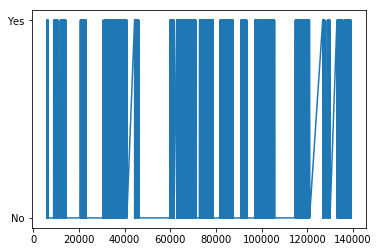

In [27]:
#Displaying plots 
plt.plot(df.loc[:, 'RainTomorrow'])

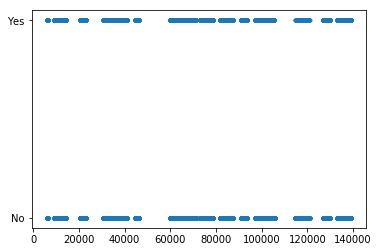

In [28]:
#For more clear visualization using dots for datapoints representation on plot
plt.plot(df.loc[:, 'RainTomorrow'],'.')

In [29]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


In [30]:
Target = pd.DataFrame(df, columns=['RainTomorrow'])
Target

,RainTomorrow
5939,No
5940,No
5942,No
5943,No
5944,No
5945,No
5946,No
5947,No
5948,No
5949,No


In [31]:
Instances = pd.DataFrame(df, columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RISK_MM'])
# Instances

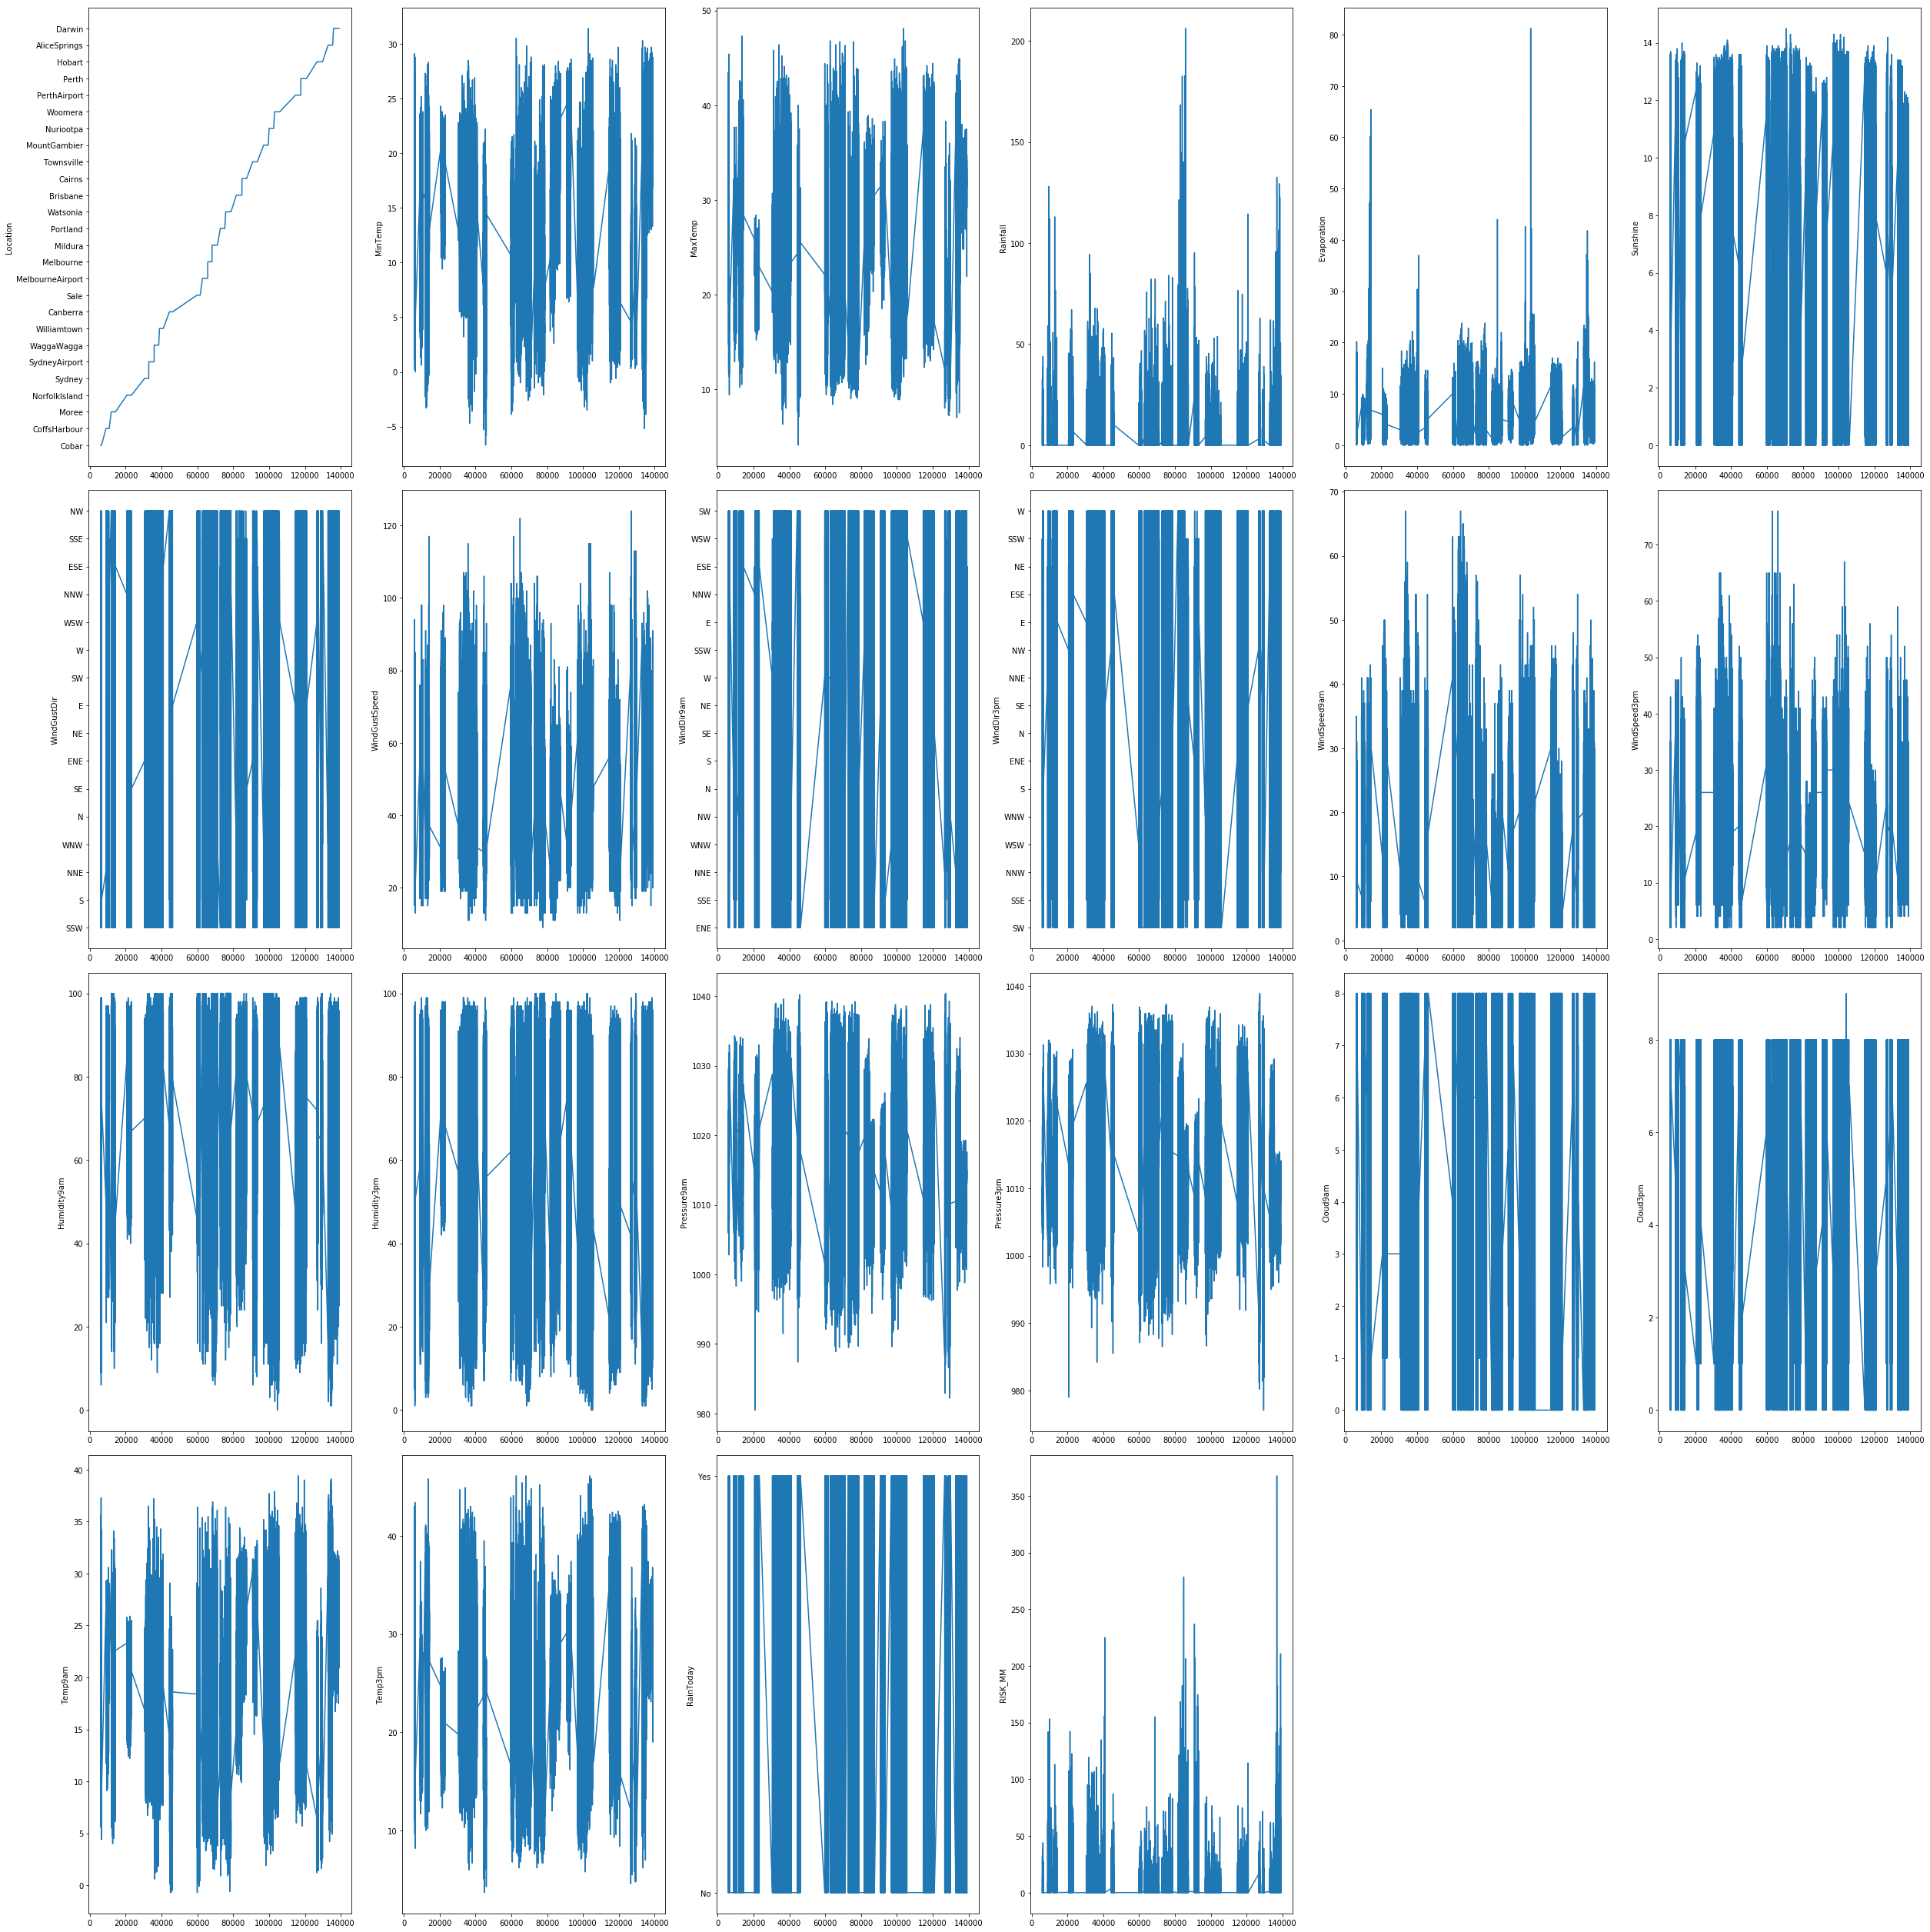

In [32]:
#Plotting with the old style 
fig = plt.figure(figsize=(35,35))
plt.clf()
for i in range(22):
    plt.subplot(4,6, i+1)
    plt.plot(Instances.iloc[:, i])
    plt.ylabel(Instances.columns.values[i])
fig.tight_layout()

In [33]:
# forgot conversion of string
locdic = {'Adelaide' : 0, 'Albany' : 1, 'Albury' : 2, 'AliceSprings' : 3, 'BadgerysCreek' : 4, 'Ballarat': 5, 
          'Bendigo' : 6, 'Brisbane' : 7, 'Cairns' :8, 'Canberra' : 9, 'Cobar': 10, 'CoffsHarbour' : 11, 'Dartmoor' :12,
          'Darwin': 13,'GoldCoast':14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 
          'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier':22, 'MountGinini': 23, 'Newcastle': 24,
          'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31,
          'PerthAirport': 32,'Portland': 33, 'Richmond': 34,'Sale': 35, 'SalmonGums':36, 'Sydney': 37, 'SydneyAirport': 38,
          'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44,
          'Williamtown': 45,'Witchcliffe': 46, 'Wollongong':47,'Woomera': 48}

winddic = {'NE' : 0, 'SSW' : 1,'SW' : 2,'W' : 3,'WSW' : 4,'S':5,'NW': 6,'SE' : 7,'N' : 8, 'SSE' : 9,
           'NNE' : 10, 'E' : 11,'ESE' : 12, 'WNW' : 13, 'ENE':14, 'NNW' : 15}

raindic = {'No' : 0, 'Yes' : 1}

df['Location'] = df['Location'].apply(lambda x: locdic[x])
df['WindGustDir'] = df['WindGustDir'].apply(lambda x: winddic[x])
df['WindDir9am'] = df['WindDir9am'].apply(lambda x: winddic[x])
df['WindDir3pm'] = df['WindDir3pm'].apply(lambda x: winddic[x])
df['RainToday'] = df['RainToday'].apply(lambda x: raindic[x])
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: raindic[x])

In [34]:
Target = pd.DataFrame(df, columns=['RainTomorrow'])
Target

,RainTomorrow
5939,0
5940,0
5942,0
5943,0
5944,0
5945,0
5946,0
5947,0
5948,0
5949,0


In [35]:
Instances = pd.DataFrame(df, columns=['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RISK_MM'])

Data = pd.concat([Instances, Target], axis=1)

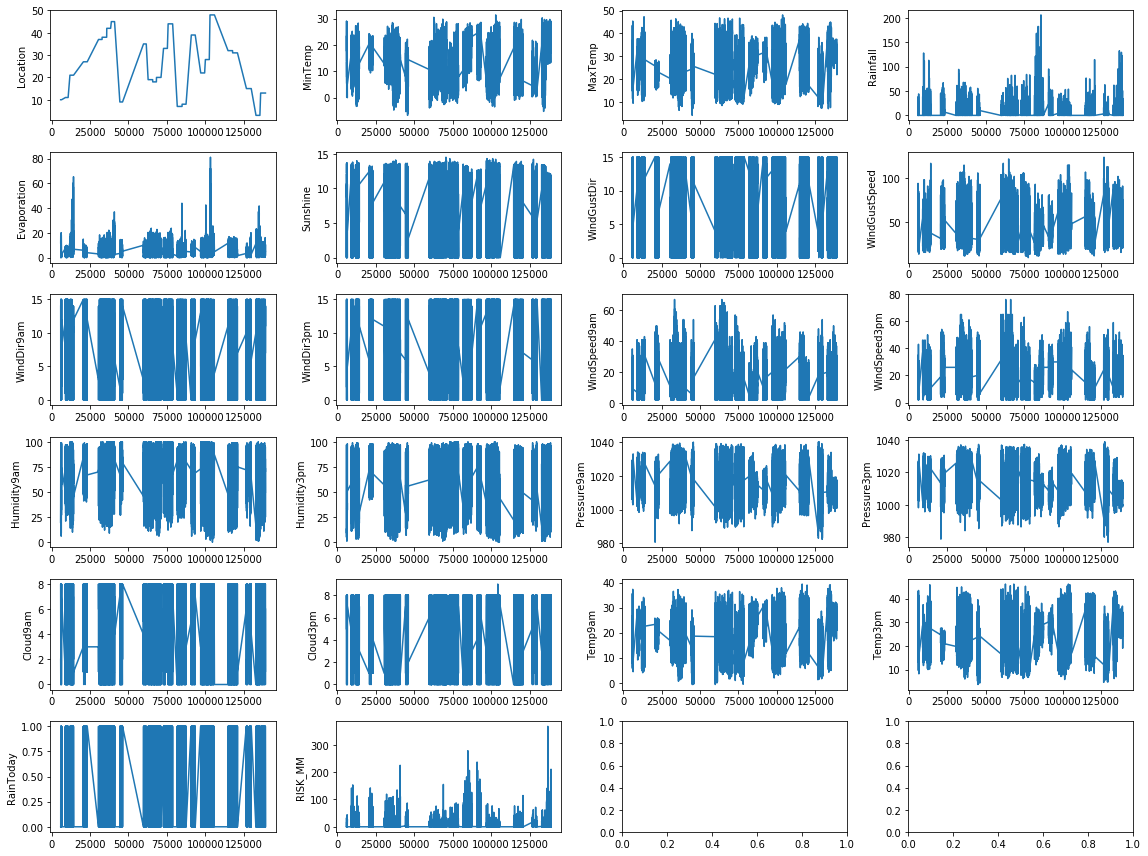

In [36]:
fig, axes = plt.subplots(6,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i,c  in enumerate(Instances.columns.values):
    Data.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

Preliminary Observations:
- Looking at the graphs it can be seen that our data has a good mixture of data from different ranges and different combinations that will help train the model on variety of instances.
- we can understand amount of data we have for each range value for individual attributes from above graphs

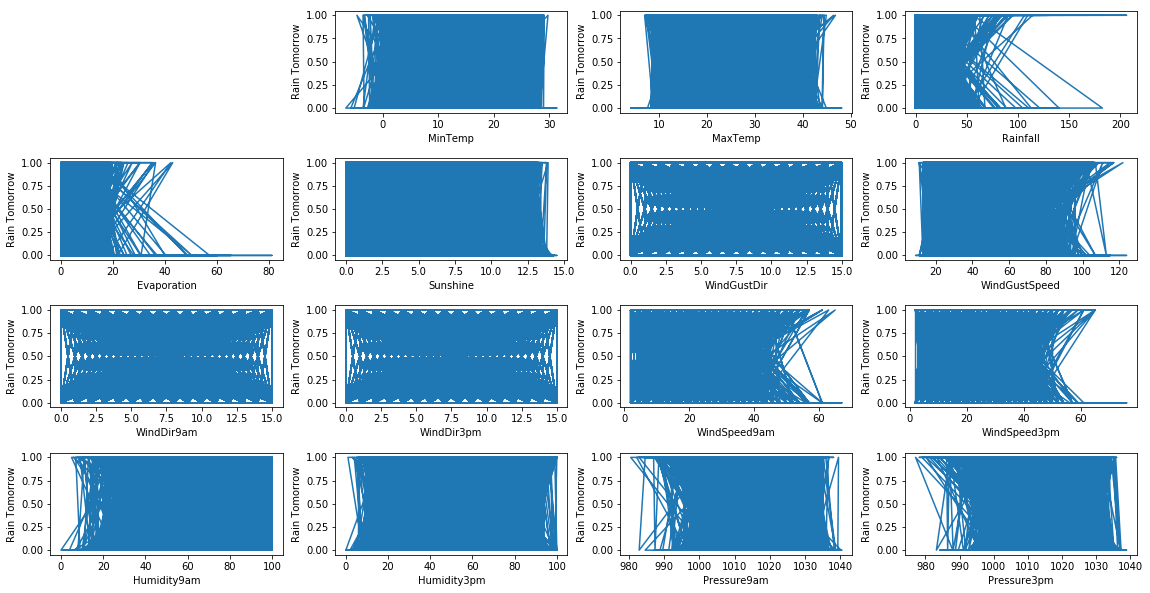

In [37]:
#Plotting scatter plots
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(1,16):
    plt.subplot(6, 4, i+1)
    plt.plot(Instances.iloc[:, i], Target)
    plt.xlabel(Instances.columns.values[i])
    plt.ylabel('Rain Tomorrow')
fig.tight_layout()

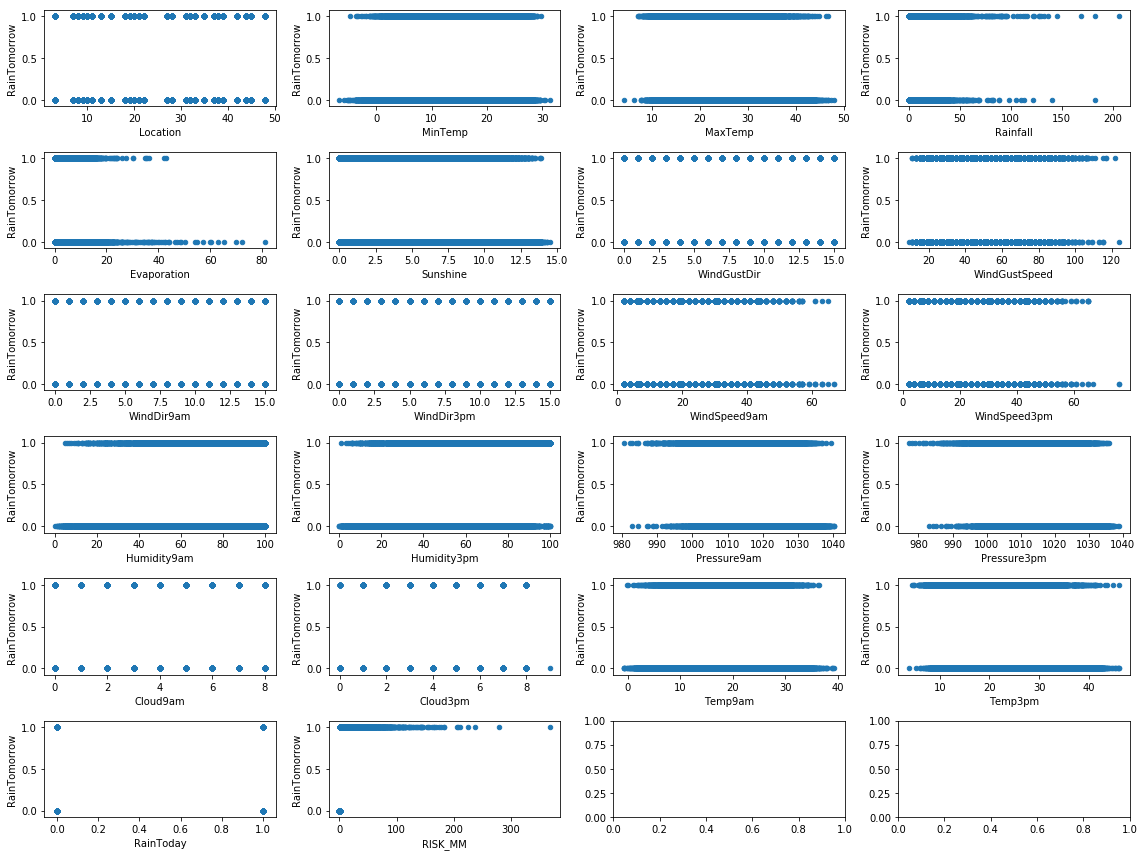

In [38]:
#Plotting scatter plots of each attribute vs the Target attribute
def area_scatter():
    fig, axes = plt.subplots(6,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(Instances.columns.values):
        Data.plot.scatter(c, 'RainTomorrow', ax=axes[int(i/4), i%4])
    fig.tight_layout()


area_scatter()

Preliminary Observations:
- As can be summarized frrom above data we have instances having combination of data where we have cases like having min temperature around 10 or 20 and we have both the instances when there was Rain the next day. Same goes fior many attributes like humidity, sunshine, windspeed, wingustspeed, temperature atb different times.
- As can be observed from RISK_MM graph as it increases the chances of Raining tomorrow are positive.
- Similarly, for the clouds graph the for each value of the attribute we have similar chances of it raining tomorrow.
- From the Wind speed at 3am it can be seen that for few instances when the wind speed increases too much the chances of it Raining tomorrow are negative.but, is interesting to note that as the windspeed for 9 am reaches high there are few examples of both positive and negative chances of it raining tomorrow.
- From Humidity at 9 am graph it can be seen that Rain Tomorrow has negative chances.
- From Rainfall graph it can inferred that as the rainfall rate for today is high there are more chances of raining tomorrow.

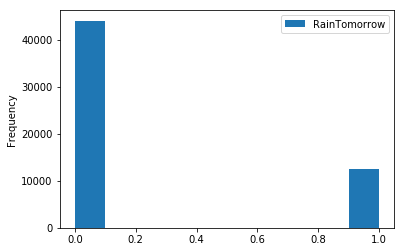

In [39]:
Target.plot.hist()

Preliminary Observations:
- As can be seen the number of times Rain Tomorrow instances are more in our dataset as compared to No Rain Tomorrow instances.
- A good balance of both the category instances is always good while training a model. As this avoids the risk of model being biased.

In [41]:
np.log(Target.iloc[0])

c:\users\sayali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


RainTomorrow   -inf
Name: 5939, dtype: float64

In [42]:
Targetlog = Target.copy()
Targetlog = Target.apply(lambda x: np.log(x+1))

In [43]:
pd.concat([Target, Targetlog], axis=1)

,RainTomorrow,RainTomorrow
5939,0,0.000000
5940,0,0.000000
5942,0,0.000000
5943,0,0.000000
5944,0,0.000000
5945,0,0.000000
5946,0,0.000000
5947,0,0.000000
5948,0,0.000000
5949,0,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6BA4449E8>]],
      dtype=object)

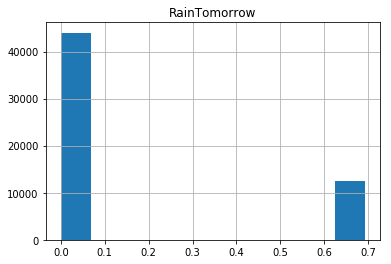

In [44]:
Targetlog.hist()

In [45]:
Data = pd.concat([Instances, Targetlog], axis=1)

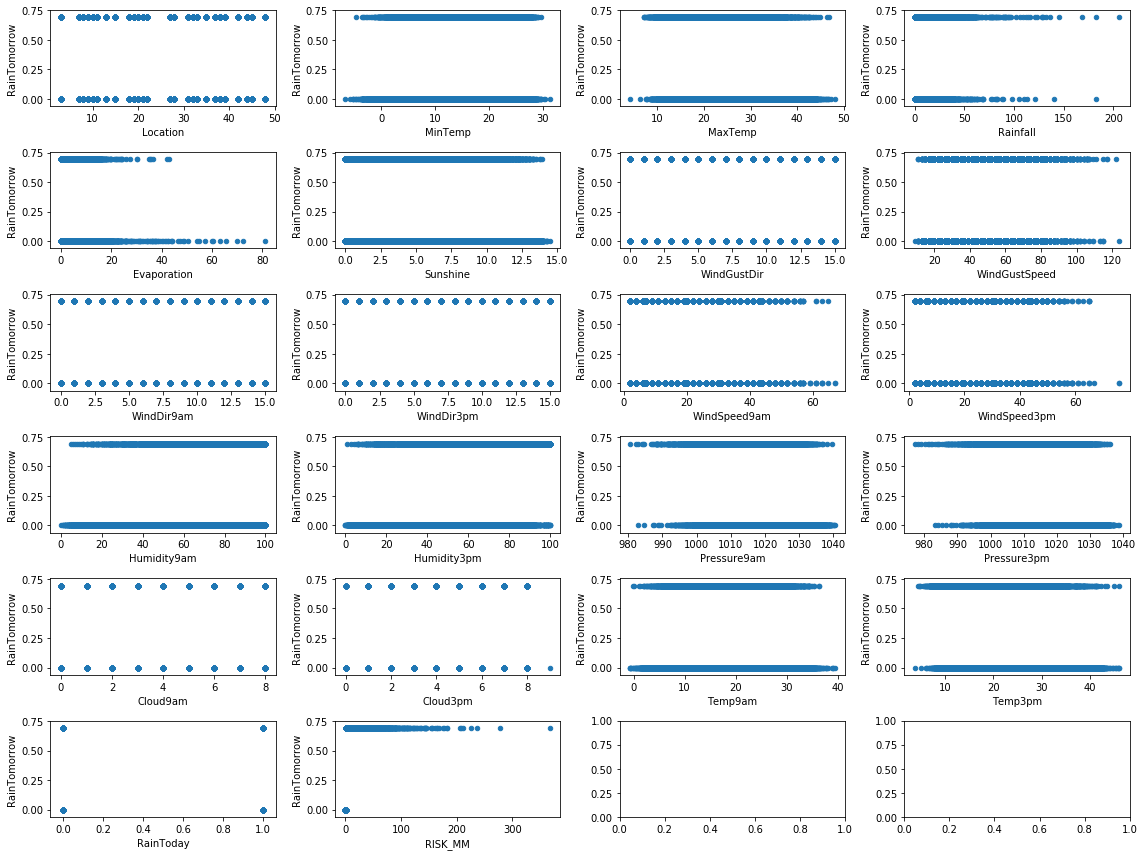

In [46]:
#Plotting log graphs
area_scatter()

## Feature Extraction

- Created a new feature that checks for the effect on the Possibility of raining tomorrow based on rain today's value

In [47]:
df['If today then Tomorrow'] = np.where((df['RainToday'] == df['RainTomorrow']), 'Yes', 'No')

In [48]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [49]:
data_2007 = df.loc[df['Year'].isin([2007])]
data_2008 = df.loc[df['Year'].isin([2008])]
data_2009 = df.loc[df['Year'].isin([2009])]
data_2010 = df.loc[df['Year'].isin([2010])]
data_2011 = df.loc[df['Year'].isin([2011])]
data_2012 = df.loc[df['Year'].isin([2012])]
data_2013 = df.loc[df['Year'].isin([2013])]
data_2014 = df.loc[df['Year'].isin([2014])]
data_2015 = df.loc[df['Year'].isin([2015])]
data_2016 = df.loc[df['Year'].isin([2016])]
data_2017 = df.loc[df['Year'].isin([2017])]

In [50]:
data_2007 = data_2007.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2008 = data_2008.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2009 = data_2009.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2010 = data_2010.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2011 = data_2011.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2012 = data_2012.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2013 = data_2013.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2014 = data_2014.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2015 = data_2015.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2016 = data_2016.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)
data_2017 = data_2017.groupby(['Month','If today then Tomorrow'])["If today then Tomorrow"].size().unstack(fill_value=0)

# data_2017

<Figure size 432x288 with 0 Axes>

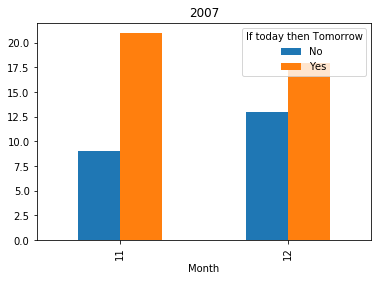

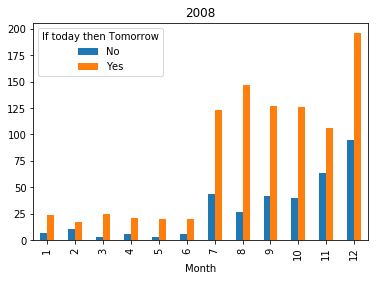

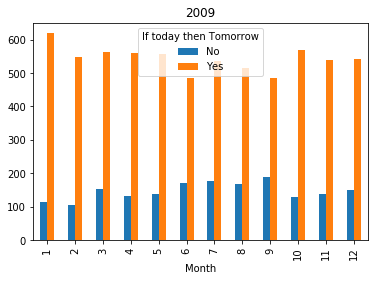

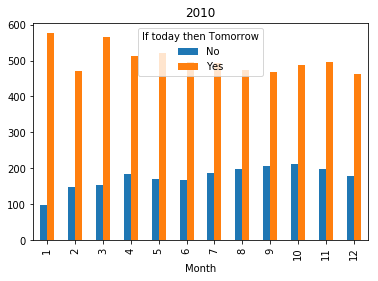

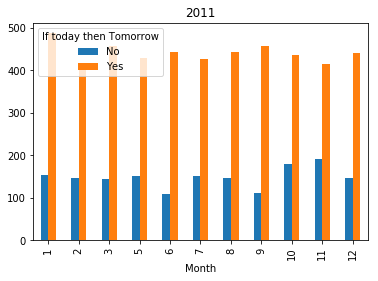

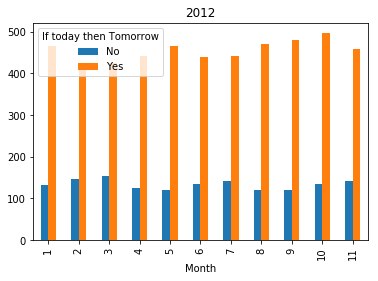

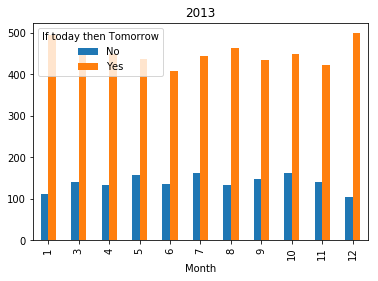

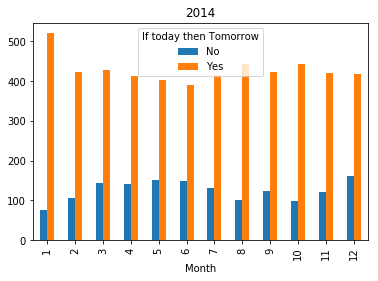

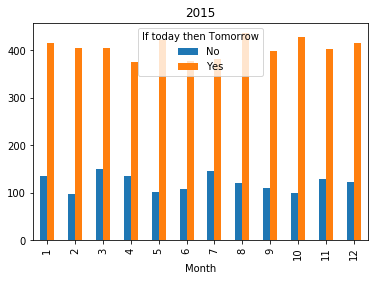

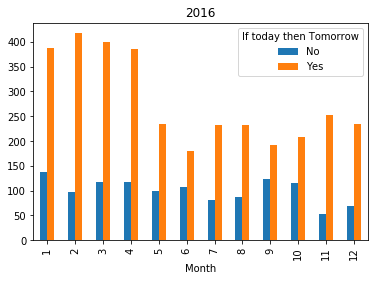

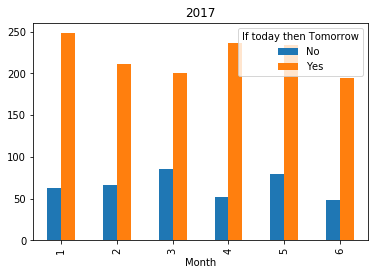

In [51]:
Years_List = [data_2007 , data_2008, data_2009,data_2010,data_2011, data_2012, data_2013, data_2014 , data_2015,
             data_2016, data_2017]
title_names = ["2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

plt.clf()
i = 0
for year in Years_List:
    year.plot.bar(title = title_names[i])
    i=i+1

Preliminary Observations:
- The above plots help us understand what is the possibility of an event happening that when it Rained today, It will rain Tomorrow too.
- As can be seen around more than 50% of the times it happened that if it Rained today, it rained the next day too.
- Thus, can be inferred that it is important to look at the 'Rain Today' column when deciding or predicting Rain Tomorrow

In [52]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,If today then Tomorrow,Month,Year
5939,1/1/2009,10,17.9,35.2,0.0,12.0,12.3,1,48.0,14,...,2.0,5.0,26.6,33.4,0,0.0,0,Yes,1,2009
5940,1/2/2009,10,18.4,28.9,0.0,14.8,13.0,5,37.0,9,...,1.0,1.0,20.3,27.0,0,0.0,0,Yes,1,2009
5942,1/4/2009,10,19.4,37.6,0.0,10.8,10.6,10,46.0,10,...,1.0,6.0,28.7,34.9,0,0.0,0,Yes,1,2009
5943,1/5/2009,10,21.9,38.4,0.0,11.4,12.2,13,31.0,13,...,1.0,5.0,29.1,35.6,0,0.0,0,Yes,1,2009
5944,1/6/2009,10,24.2,41.0,0.0,11.2,8.4,13,35.0,6,...,1.0,6.0,33.6,37.6,0,0.0,0,Yes,1,2009
5945,1/7/2009,10,27.1,36.1,0.0,13.0,0.0,8,43.0,8,...,8.0,8.0,30.7,34.3,0,0.0,0,Yes,1,2009
5946,1/8/2009,10,23.3,34.0,0.0,9.8,12.6,1,41.0,5,...,3.0,1.0,25.0,31.5,0,0.0,0,Yes,1,2009
5947,1/9/2009,10,16.1,34.2,0.0,14.6,13.2,7,37.0,7,...,1.0,1.0,20.7,32.8,0,0.0,0,Yes,1,2009
5948,1/10/2009,10,19.0,35.5,0.0,12.0,12.3,14,48.0,14,...,1.0,5.0,23.4,33.3,0,0.0,0,Yes,1,2009
5949,1/11/2009,10,19.7,35.5,0.0,11.0,12.7,0,41.0,10,...,1.0,5.0,24.0,33.6,0,0.0,0,Yes,1,2009


In [53]:
df['If today then Tomorrow'] = df['If today then Tomorrow'].apply(lambda x: raindic[x])

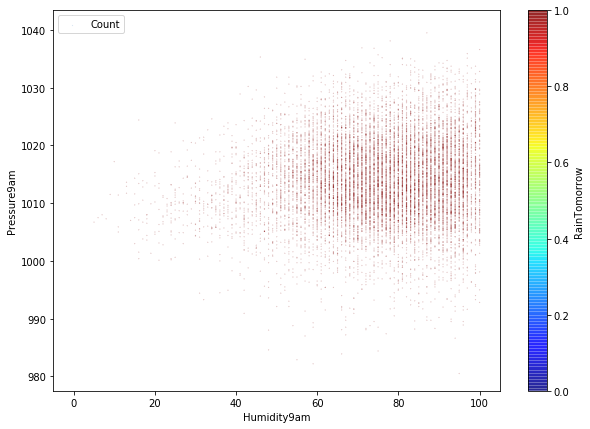

In [54]:
# Scatter plot for Humidity, Pressure at 9 am on x axis, y axis, and RainTomorrow as color bar.
fig, ax = plt.subplots()
df.plot(kind="scatter",x='Humidity9am',y='Pressure9am',s=df['RainTomorrow']/50, label="Count",alpha=0.6, figsize=(10,7),c='RainTomorrow', cmap=plt.get_cmap("jet"), colorbar=True,ax=ax)

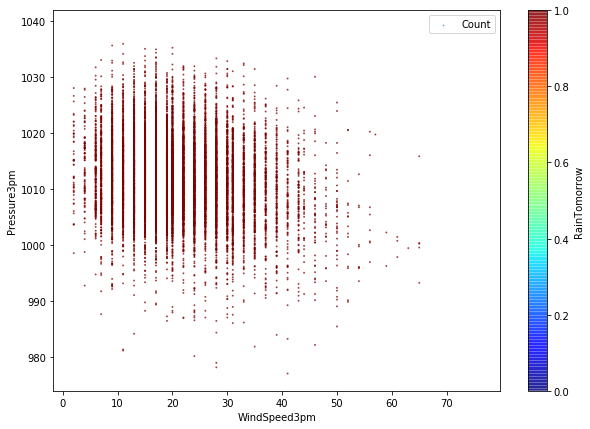

In [55]:
# Scatter plot for Windspeed, Pressure at 3 pm on x axis, y axis, and RainTomorrow as color bar.
fig, ax = plt.subplots()
df.plot(kind="scatter",x='WindSpeed3pm',y='Pressure3pm',s=df['RainTomorrow'], label="Count",alpha=0.6, figsize=(10,7),c='RainTomorrow', cmap=plt.get_cmap("jet"), colorbar=True,ax=ax)

Preliminary Observations:
- As can be seen form the plot that if there are lower windspeed and moderate Pressure there are high chances of Raining Tomorrow.

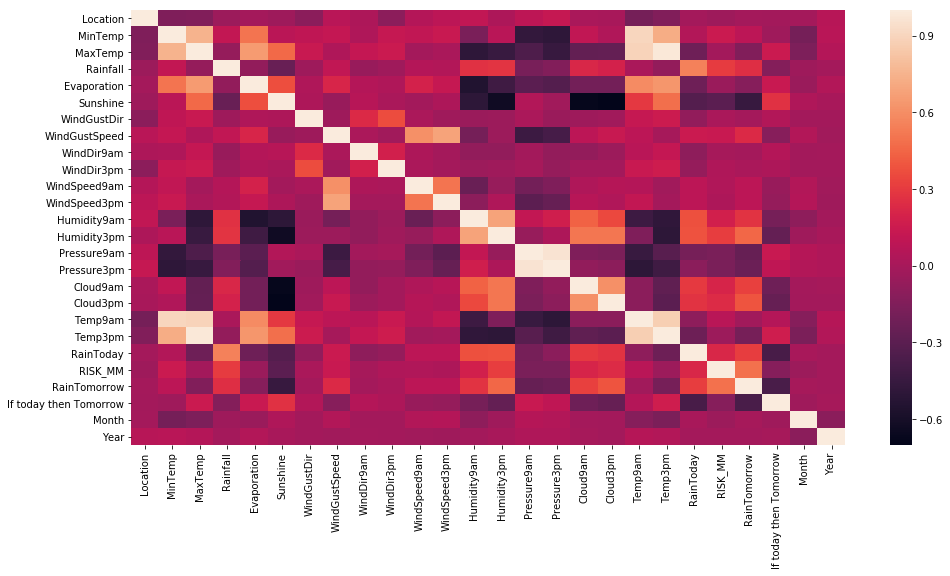

In [56]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Preliminary Observations:
- As can be observed, MinTemp and MaxTemp are positively correlated with Temp9am, Temp3pm, Evaporation, Risk_MM. Humidity is positively correlated with rainfall, Pressure, Cloud, RainToday, Risk_MM, RainTomorrow. Evaporation is positively correlated with Sunshine, Wind, Winspeed, Temperature and lesser with Humidity.

In [58]:
raindic = {0: -1, 1 : 1}
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: raindic[x])

In [59]:
df_model = df.drop(['Date', 'Year'], axis = 1)

In [60]:
df = pd.DataFrame(df_model)

In [61]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,If today then Tomorrow,Month
5939,10,17.9,35.2,0.0,12.0,12.3,1,48.0,14,2,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,-1,1,1
5940,10,18.4,28.9,0.0,14.8,13.0,5,37.0,9,9,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,-1,1,1
5942,10,19.4,37.6,0.0,10.8,10.6,10,46.0,10,15,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,-1,1,1
5943,10,21.9,38.4,0.0,11.4,12.2,13,31.0,13,4,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,-1,1,1
5944,10,24.2,41.0,0.0,11.2,8.4,13,35.0,6,13,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,-1,1,1
5945,10,27.1,36.1,0.0,13.0,0.0,8,43.0,8,13,...,1007.4,8.0,8.0,30.7,34.3,0,0.0,-1,1,1
5946,10,23.3,34.0,0.0,9.8,12.6,1,41.0,5,9,...,1009.9,3.0,1.0,25.0,31.5,0,0.0,-1,1,1
5947,10,16.1,34.2,0.0,14.6,13.2,7,37.0,7,5,...,1009.2,1.0,1.0,20.7,32.8,0,0.0,-1,1,1
5948,10,19.0,35.5,0.0,12.0,12.3,14,48.0,14,4,...,1004.0,1.0,5.0,23.4,33.3,0,0.0,-1,1,1
5949,10,19.7,35.5,0.0,11.0,12.7,0,41.0,10,4,...,1005.8,1.0,5.0,24.0,33.6,0,0.0,-1,1,1


In [62]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,If today then Tomorrow,Month
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,25.464729,13.464770,24.219206,2.130397,5.503135,7.735626,7.240518,40.877366,7.617458,7.304608,...,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,2.346960,-0.559482,0.762442,6.425009
std,12.765343,6.416689,6.970676,7.014822,3.696282,3.758153,4.532100,13.335232,4.483252,4.574000,...,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,8.731885,0.828850,0.425590,3.451383
min,3.000000,-6.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,-1.000000,0.000000,1.000000
25%,15.000000,8.600000,18.700000,0.000000,2.800000,5.000000,3.000000,31.000000,4.000000,3.000000,...,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,-1.000000,1.000000,3.000000
50%,27.000000,13.200000,23.900000,0.000000,5.000000,8.600000,7.000000,39.000000,8.000000,7.000000,...,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,-1.000000,1.000000,6.000000
75%,37.000000,18.400000,29.700000,0.600000,7.400000,10.700000,11.000000,48.000000,11.000000,11.000000,...,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.600000,-1.000000,1.000000,9.000000
max,48.000000,31.400000,48.100000,206.200000,81.200000,14.500000,15.000000,124.000000,15.000000,15.000000,...,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,367.600000,1.000000,1.000000,12.000000


# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each)
Relate the choice of your data!
## Explaination for different Neural Network Structures used:

I have chosen three  Feed Forward Deep Neural Network structures for my data. These three models have 6 hidden layers each with different number of hidden neurons in each layer.The motive behind this is to see the performance of these structures on the real data.

- First DNN(Contracting) :
    - The first network has a contracting structure. It means the number of hidden neurons are decreasing in each layer. They are as follows 60 - 50 - 40 - 30 - 20 - 10. Taking approximately 3 times the number of nodes as input features and then decreasing by 10 at each hidden layer until six hidden layers. I have chosen this network structure as I wanted to see  how the network works when the number of nodes expand from one hidden layer to another layer. 
    
- Second DNN(Expanding) : 
    - The second network has exactly opposite network structure than the first one. Here, I have implemented an expanding structure of nodes in hidden layers which goes like 10 - 20 - 30 - 40 - 50 - 60 to observe how the expanding network performs on the real data. The number of hidden neurons in the first layer are approximately half the number of nodes as input features and then increases by 10 at each hidden layer until six hidden layers.
    
- Third DNN(Contract-Expand) : 
     - In this model I have taken 6 layers with the number of hidden neurons contracting and expanding(25 - 20 - 15 - 15 - 20 - 25). The first layer has approximately the same number of nodes as input features and then decreases by 5 at each hidden layer till it reaches the half of the total number of layers and again starts expanding by 5 till it reaches the same number of nodes as in the first hidden layer.

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
df = df.dropna(axis = 0, how ='any')

In [6]:
locdic = {'Adelaide' : 0, 'Albany' : 1, 'Albury' : 2, 'AliceSprings' : 3, 'BadgerysCreek' : 4, 'Ballarat': 5, 
          'Bendigo' : 6, 'Brisbane' : 7, 'Cairns' :8, 'Canberra' : 9, 'Cobar': 10, 'CoffsHarbour' : 11, 'Dartmoor' :12,
          'Darwin': 13,'GoldCoast':14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 
          'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier':22, 'MountGinini': 23, 'Newcastle': 24,
          'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31,
          'PerthAirport': 32,'Portland': 33, 'Richmond': 34,'Sale': 35, 'SalmonGums':36, 'Sydney': 37, 'SydneyAirport': 38,
          'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44,
          'Williamtown': 45,'Witchcliffe': 46, 'Wollongong':47,'Woomera': 48}

winddic = {'NE' : 0, 'SSW' : 1,'SW' : 2,'W' : 3,'WSW' : 4,'S':5,'NW': 6,'SE' : 7,'N' : 8, 'SSE' : 9,
           'NNE' : 10, 'E' : 11,'ESE' : 12, 'WNW' : 13, 'ENE':14, 'NNW' : 15}

raindic = {'No' : -1, 'Yes' : 1}

df['Location'] = df['Location'].apply(lambda x: locdic[x])
df['WindGustDir'] = df['WindGustDir'].apply(lambda x: winddic[x])
df['WindDir9am'] = df['WindDir9am'].apply(lambda x: winddic[x])
df['WindDir3pm'] = df['WindDir3pm'].apply(lambda x: winddic[x])
df['RainToday'] = df['RainToday'].apply(lambda x: raindic[x])
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: raindic[x])

In [7]:
df = df.drop(['Date'], axis = 1)

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,10,17.9,35.2,0.0,12.0,12.3,1,48.0,14,2,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,-1,0.0,-1
5940,10,18.4,28.9,0.0,14.8,13.0,5,37.0,9,9,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,-1,0.0,-1
5942,10,19.4,37.6,0.0,10.8,10.6,10,46.0,10,15,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,-1,0.0,-1
5943,10,21.9,38.4,0.0,11.4,12.2,13,31.0,13,4,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,-1,0.0,-1
5944,10,24.2,41.0,0.0,11.2,8.4,13,35.0,6,13,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,-1,0.0,-1
5945,10,27.1,36.1,0.0,13.0,0.0,8,43.0,8,13,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,-1,0.0,-1
5946,10,23.3,34.0,0.0,9.8,12.6,1,41.0,5,9,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,-1,0.0,-1
5947,10,16.1,34.2,0.0,14.6,13.2,7,37.0,7,5,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,-1,0.0,-1
5948,10,19.0,35.5,0.0,12.0,12.3,14,48.0,14,4,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,-1,0.0,-1
5949,10,19.7,35.5,0.0,11.0,12.7,0,41.0,10,4,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,-1,0.0,-1


### Code Explanation:

#### Functions:
- partition(): Function to partition the dataset into Train and Test sets.
- createIndicatorMatrix(): Function to create indicator matrix for the labels(classes).
- normalize():  Function to normalize the input data.

#### Variables:
- learning_rate: it is kept as 0.05 for the model.
- training epochs:  the number of iterations are kept to be 200
    - The learning rate and training epochs are kept constant through all the networks for consistency.
- cost_history: Cost value of each epoch.
- n_dim = number of input features. 
- n_class = the number of categories for classification.
- n_hidden_1 to n_hidden_6: these variables tell the number of hidden nodes in each layer.
- x = placeholder in tf for storing input variables.
- W = Variables in tf for storing the weight which will be updated.
- b = Variable in tf used to store the bias.
- y_ = placeholder to store the outputs.

- After declaring the variables, the different layers of the DNN are built by adding the input or previous layers and the weights and bias.
- For each hidden layer of the DNNs sigmoid activation function is used except for the last one where relu is used
- Softmax crossentropy loss is used calculating the mean error between the predictions and the actual labels.
- In the training step, GradientDescentOptimizer is used along with function to minimize the cost functions.
- the code is then run for the number of epochs and the accuracy and the mean error for each epoch is calculated and plotted.

In [9]:
def partition(X, T, ratio=[0.8, 0.2]):
        assert(np.sum(ratio) == 1)
         # shuffle the data indices 
        idxs = np.random.permutation(X.index)
        # the number of samples 
        N = X.shape[0]
    
        Xs = []
        Ts = []
        i = 0  # first index to zero
        for k, r in enumerate(ratio):
            nrows = int(round(N * r))  # number of rows
            
            if k == len(ratio) -1:
                Xs.append(X.iloc[i:, :])
                Ts.append(T.iloc[i:,])
            else:
                row = i+nrows
                
                Xs.append(X.iloc[:row, :])
                Ts.append(T.iloc[:row,])
        
            i += nrows
    
        return Xs, Ts
    
def createIndicatorMatrix(T):
    # T_train
    if(type(T) != list):
        T= list(T)
    T = pd.DataFrame(T, columns = ['A']) 
    T['B'] = 0 
    T['B'] = np.where((T['A'] == 1), 1, 0)
    T['A'] = np.where((T['B'] == 0), 1, 0)
    return T

def normalize(X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        meanX = np.mean(X, 0)
        stdX = np.std(X, 0)

        Xs = (X - meanX) / stdX 
        return Xs

In [10]:
Target = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [11]:
# Target
# X

In [12]:
X,T = partition(X,Target)
X_train = X[0]
X_test = X[1]
T_train = T[0]
T_test = T[1]

In [13]:
# X_train = normalize(X_train)
# X_test = normalize(X_test)

For the experimental code, I have taken two nodes which is a constant and the data type is float. The two nodes are added in the to a new node op_add in the session.

In [14]:
import tensorflow as tf

In [15]:
T_train= np.asarray(createIndicatorMatrix(T_train))
T_test= np.asarray(createIndicatorMatrix(T_test))

In [16]:
learning_rate = 0.05
training_epochs = 200
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X_train.shape[1] 
n_class = 2 

### Contracting Model:

In [28]:
n_hidden_1 = 60 
n_hidden_2 = 50
n_hidden_3 = 40
n_hidden_4 = 30
n_hidden_5 = 20
n_hidden_6 = 10

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

Wts = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

Bias = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer1 = tf.add(tf.matmul(x, Wts['h1']),  Bias['b1'])
layer1 = tf.nn.sigmoid(layer1)
    
layer2 = tf.add(tf.matmul(layer1, Wts['h2']),  Bias['b2'])
layer2 = tf.nn.sigmoid(layer2)

layer3 = tf.add(tf.matmul(layer2, Wts['h3']),  Bias['b3'])
layer3 = tf.nn.sigmoid(layer3)

layer4 = tf.add(tf.matmul(layer3, Wts['h4']),  Bias['b4'])
layer4 = tf.nn.sigmoid(layer4)

layer5 = tf.add(tf.matmul(layer4, Wts['h5']),  Bias['b5'])
layer5 = tf.nn.sigmoid(layer5)

layer6 = tf.add(tf.matmul(layer5, Wts['h6']),  Bias['b6'])
layer6 = tf.nn.relu(layer6)

out_layer = tf.matmul(layer6, Wts['out']) + Bias['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

MSE Plot


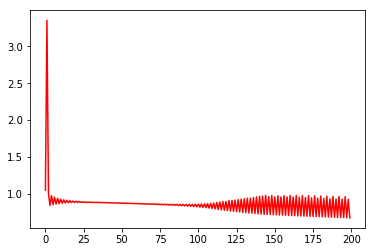

Accuracy over epochs


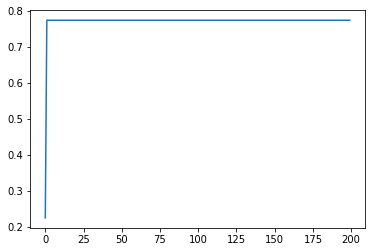

Test accuracy:  0.800514
MSE Score 0.6736


In [29]:
print('MSE Plot')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE Score %.4f" % sess.run(mse))

sess.close()

#### Observations:

- The model above was fairly effective in classifying the data correctly. Over the training eochs, the MSE has decreased rapidly to 0.6 which reduces little bit more as the number of epochs completed increases. The MSE keeps on fluctuating for the last epochsfrom 115 to 200.
- The test accuracy is around 80% with MSE score of 0.6736 which shows that the model performed quite well.
- The MSE might have reduced further if the number of epochs would have been increased. In ordeer to check the performances of the model accross all the networks keeping the parameters consistent.


### Expanding Model:

In [19]:
n_hidden_1 = 10 
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) 
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

Wts = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}

Bias = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()
saver = tf.train.Saver() 

layer1 = tf.add(tf.matmul(x, Wts['h1']),  Bias['b1'])
layer1 = tf.nn.sigmoid(layer1)
    
layer2 = tf.add(tf.matmul(layer1, Wts['h2']),  Bias['b2'])
layer2 = tf.nn.sigmoid(layer2)

layer3 = tf.add(tf.matmul(layer2, Wts['h3']),  Bias['b3'])
layer3 = tf.nn.sigmoid(layer3)

layer4 = tf.add(tf.matmul(layer3, Wts['h4']),  Bias['b4'])
layer4 = tf.nn.sigmoid(layer4)

layer5 = tf.add(tf.matmul(layer4, Wts['h5']),  Bias['b5'])
layer5 = tf.nn.sigmoid(layer5)

layer6 = tf.add(tf.matmul(layer5, Wts['h6']),  Bias['b6'])
layer6 = tf.nn.relu(layer6)

out_layer = tf.matmul(layer6, Wts['out']) + Bias['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))  
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)

MSE Plot


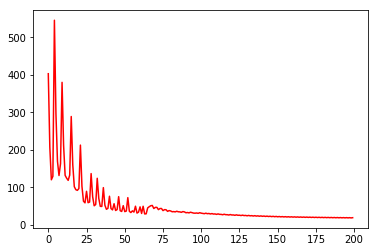

Accuracy over epochs


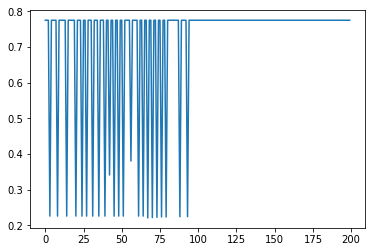

Test accuracy:  0.800514
MSE Score: 19.3959


In [20]:
print('MSE Plot')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE Score: %.4f" % sess.run(mse))

sess.close()

#### Observations:

- The model above was fairly effective in classifying the data correctly. Over the training eochs, the MSE keeps on fluctuating till first 75 epochs.
- The test accuracy is around 80% with MSE score of 19.39. 
- First model performs better on the data than this model.

### Contract-Expand:

In [17]:
n_hidden_1 = 20
n_hidden_2 = 15
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 15
n_hidden_6 = 20

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class])) 
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])


Wts = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}


Bias = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class])) 
}

init = tf.global_variables_initializer()
saver = tf.train.Saver()

layer1 = tf.add(tf.matmul(x, Wts['h1']),  Bias['b1'])
layer1 = tf.nn.sigmoid(layer1)
    
layer2 = tf.add(tf.matmul(layer1, Wts['h2']), Bias['b2'])
layer2 = tf.nn.sigmoid(layer2)


layer3 = tf.add(tf.matmul(layer2, Wts['h3']), Bias['b3'])
layer3 = tf.nn.sigmoid(layer3)

layer4 = tf.add(tf.matmul(layer3, Wts['h4']),  Bias['b4'])
layer4 = tf.nn.sigmoid(layer4)

layer5 = tf.add(tf.matmul(layer4, Wts['h5']),  Bias['b5'])
layer5 = tf.nn.sigmoid(layer5)

layer6 = tf.add(tf.matmul(layer5, Wts['h6']),  Bias['b6'])
layer6 = tf.nn.relu(layer6)

out_layer = tf.matmul(layer6, Wts['out']) + Bias['out']
y= out_layer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) 

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: X_train, y_: T_train})
    cost = sess.run(cost_function, feed_dict={x: X_train, y_: T_train})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: X_test})
    mse = tf.reduce_mean(tf.square(pred_y - T_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: X_train, y_: T_train}))
    accuracy_history.append(accuracy)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



MSE Plot


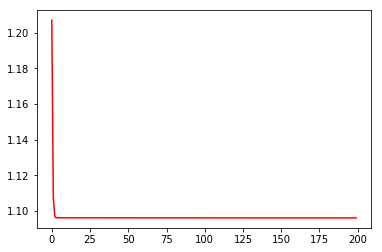

Accuracy over epochs


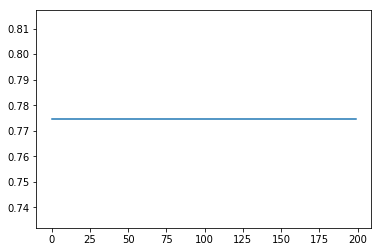

Test accuracy:  0.800514
MSE Score: 1.0960


In [18]:
print('MSE Plot')
plt.plot(mse_history, 'r')
plt.show()
print('Accuracy over epochs')
plt.plot(accuracy_history)
plt.show()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ", (sess.run(accuracy, feed_dict={x: X_test, y_: T_test})))
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - T_test))
print("MSE Score: %.4f" % sess.run(mse))

sess.close()

#### Observations:

- The model above was quite effective in classifying the data correctly. Over the training eochs, the MSE started with 1.2 as the error rate and falling to 1.09 after first few epochs.
- The test accuracy is around 80% with MSE score of 1.0960  The error rate remains constant at 1.09 after that.

# IV - Results

- First DNN: The Test Accuracy is 80% and MSE scoreis 0.67
- Second DNN: The Test Accuracy is
- Third DNN: The Test Accuracy is  80% and MSE is 1.0960

-  To conclude, the model with Contract-Expand architecture worked pretty well than as compared to First DNN (Contracting) Model. 
- The results or performances of these models kept on changing on every run.

# Conclusions

- The only new thing to understand was working of tensorflow how the inputs are taken in it and the way the variables are defined in it. 
- But, after that implementing the models with tensorflow is fairly easy adn requires less efforts than usual.
- The main challenge was to figure out how to implement the DNN, after the first model was implemented it was fairly easy to implement the other 3 models(all I had to do was to change the number of nodes for each hidden layer)


# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 

    - For this experiment I have run the code on GPU on FloydHub and recorded the timings. The training speeds for both CPU and GPU was recorded and their approximate values are as shown below.
    
DNN Model | CPU Speed| GPU Speed|
--|--|:--|
Contracting | 71.5 ms | 11.5 ms|
Expanding | 145 ms|14.7 ms|
Contract-Expand| 135 ms|14.9 ms|
    
Time taken for Contracting Model:

CPU:
<img src="cpu.PNG" width="50%" title="Time record for Contracting-Expanding model in CPU">
GPU:
<img src="gpu1.PNG" width="50%" title="Time record for Contracting-Expanding model in GPU">


[Note: The folder 'Extra Credits' has code executed on GPU and screenshots taken for comparison.]

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
